## Shannon entropy of image


#### Import image

In [1]:
from scipy.fft import fft, ifft   

import sys
import os
pwd = os.getcwd()
root = pwd.split("home", 1)[0]
modelling_home = root + 'home/Documents/modelling'
modelling_ephemeral = root + 'ephemeral/Documents/modelling'
modulepath = modelling_home + '/3954/modules'
sys.path.append(modulepath)
from numerical_solvers_variableboundary import *
from PIL import Image, ImageDraw
import numpy as np
from numpy import asarray
import pickle

ModuleNotFoundError: No module named 'numerical_solvers_variableboundary'

In [5]:
def plot(parID,filename,results_path,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )
    plot_redgreen_contrast(final_concentration,L,mechanism,shape,filename,savefig_path,parID=parID,scale_factor=x_gridpoints,save_figure=save_figure)

In [6]:
def entropy_fourier(parID,filename,results_path,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )

    
    if show_fig==True:
        plot(parID,filename,results_path)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    #normalise so total sum=1
    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    H_red=0
    H_green=0
    binwidth_real = 0.001
    binwidth_im = 0.001

    f_red = fft(pixels_red)
    f_red_real = np.real(f_red)
    f_red_im = np.imag(f_red)

#     hist_i = plt.hist(pixels_red, bins=np.arange(np.amin(pixels_red), np.amax(pixels_red) + binwidth_real, binwidth_real))  
    pixels_red_vector = np.reshape(pixels_red,-1)
    hist_i = plt.hist(pixels_red_vector, bins=np.linspace(np.amin(pixels_red_vector), np.amax(pixels_red_vector) + binwidth_real, 15))  

    if show_fig == True:
        plt.title('probability of Cn(a,b)')
        plt.show()
    
    
#     hist_a = plt.hist(f_red_real, bins=np.arange(np.amin(f_red_real), np.amax(f_red_real) + binwidth_real, binwidth_real))  
    f_red_real_vector = np.reshape(f_red_real,-1)
    hist_a = plt.hist(f_red_real_vector, bins=np.linspace(np.amin(f_red_real_vector), np.amax(f_red_real_vector) + binwidth_real, 15))  

    if show_fig == True:
        plt.title('probability of Cn(m,n) real')
        plt.show()
    
#     hist_b = plt.hist(f_red_im, bins=np.arange(np.amin(f_red_im), np.amax(f_red_im) + binwidth_im, binwidth_im))  
    f_red_im_vector = np.reshape(f_red_im,-1)
    hist_b = plt.hist(f_red_im_vector, bins=np.linspace(np.amin(f_red_im_vector), np.amax(f_red_im_vector) + binwidth_im, 15))  

    
    if show_fig == True:
        plt.title('probability of Cn(m,n) imag')
        plt.show()
    return hist_i, hist_a,hist_b
    

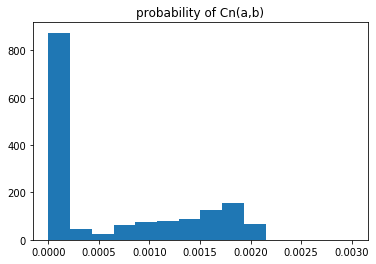

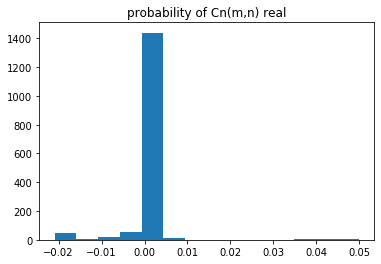

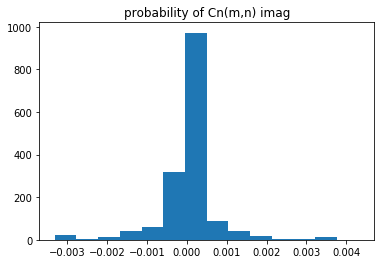

15846.437393230954
13967.80752095294
-16557.944022745054


In [20]:
parID = 411
filename = '2Dfinal_circuit2_variant0_boundary1_growing_colony_generalID%s_L8_J40_T100_N4800.pkl'%parID
results_path = modelling_home + '/3954/numerical_confocal/results/simulation/'
i, a,b = entropy_fourier(parID,filename,results_path,show_fig=False)
HKS = np.sum([p*np.log2(p) for p in i[0] if p!=0])

IKS_real = np.sum([p*np.log2(p) for p in a[0] if p!=0])
print(IKS_real)
IKS_im = np.sum([p*np.log2(p) for p in b[0] if p!=0])
print(IKS_im)
IKS_tot = IKS_real + IKS_im
kSI = HKS -IKS_tot
print(kSI)

In [11]:
HKS = np.sum([p*np.log2(p) for p in i[0] if p!=0])
HKS


13256.300891438843

In [16]:
#how to approach real and imag for IKS?
IKS_real = np.sum([p*np.log2(p) for p in a[0] if p!=0])
print(IKS_real)
IKS_im = np.sum([p*np.log2(p) for p in b[0] if p!=0])
print(IKS_im)
IKS_tot = IKS_real + IKS_im


15846.437393230954
13967.80752095294


In [19]:
kSI = HKS -IKS_tot
print(kSI)

-16557.944022745054


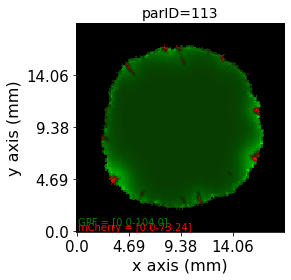

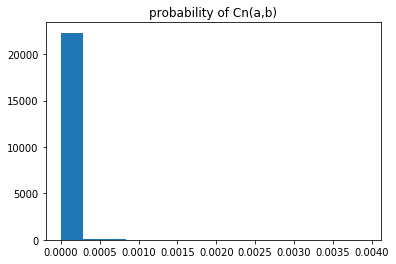

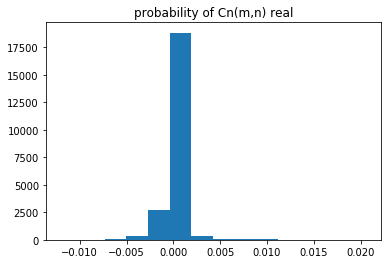

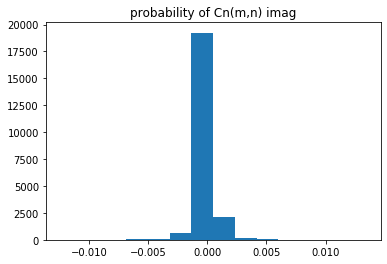

323127.9858413349


In [32]:
parID = 113
filename = '2Dfinal_circuit2_variant5716gaussian_ca_nodeAdeleID%s_L10_J150_T120_N1200.pkl'%parID
results_path = modelling_home + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit_newCN/'
i, a,b = entropy_fourier(parID,filename,results_path,show_fig=True)
HKS = np.sum([p*np.log2(p) for p in i[0] if p!=0])
print(HKS)

In [ ]:
kSI = 

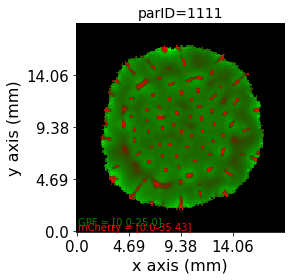

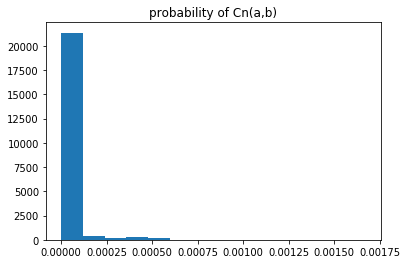

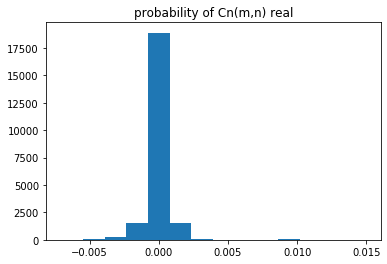

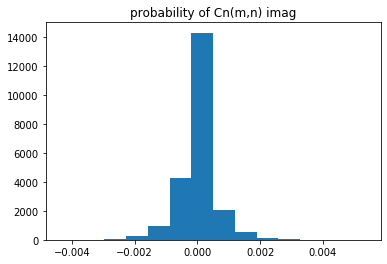

316445.29932163376


In [22]:
parID = 1111
filename = '2Dfinal_circuit2_variant5716gaussian_ca_nodeAdeleID%s_L10_J150_T120_N1200.pkl'%parID
results_path = modelling_home + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit_newCN/'
i, a,b = entropy_fourier(parID,filename,results_path,show_fig=True)
HKS = np.sum([p*np.log2(p) for p in i[0] if p!=0])
print(HKS)

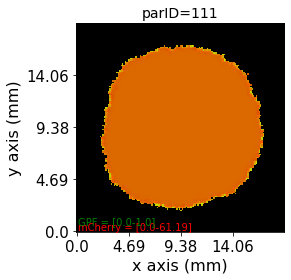

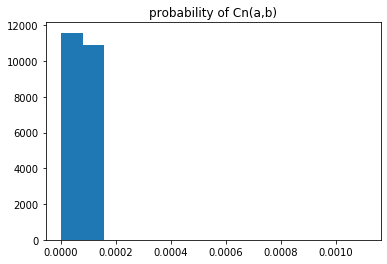

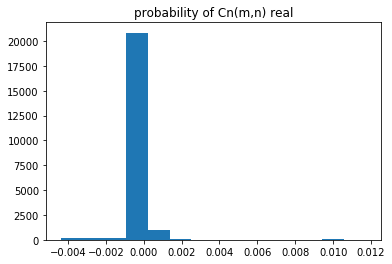

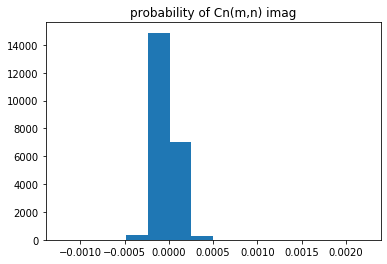

302811.49387741723


In [26]:
parID = 111
filename = '2Dfinal_circuit2_variant5716gaussian_ca_nodeAdeleID%s_L10_J150_T120_N1200.pkl'%parID
results_path = modelling_home + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit_newCN/'
i, a,b = entropy_fourier(parID,filename,results_path,show_fig=True)
HKS = np.sum([p*np.log2(p) for p in i[0] if p!=0])
print(HKS)

In [ ]:
results_path = modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit'
parID_list = [11428,4699,9740,16291,4781,20319,20230]
entropy_dict = {}
for parID in parID_list:
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    entropy_dict[parID]=entropy(parID,filename,results_path)
entropy_dict = sorted(entropy_dict.items(), key=lambda x: x[1][2],reverse=True)


for keys,items in entropy_dict:
    print (keys,items)
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%keys


    plot(keys,filename,results_path)



20574 (11.250583411133293, 10.379456625642122, 10.815020018387708)


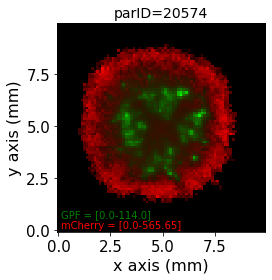

28641 (6.984112556277415, 11.412449372117047, 9.198280964197231)


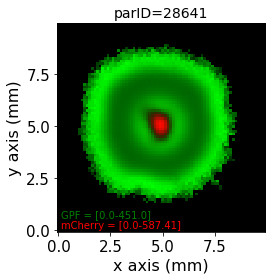

In [4]:
# results_path = modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit'
results_path = modelling_home + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D'


# parID_list = [11428,4699,9740,16291,4781,13482,20319,11141]
parID_list = [28641,20574]

entropy_dict = {}
for parID in parID_list:
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    entropy_dict[parID]=entropy(parID,filename,results_path)
entropy_dict = sorted(entropy_dict.items(), key=lambda x: x[1][2],reverse=True)


for keys,items in entropy_dict:
    print (keys,items)
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%keys


    plot(keys,filename,results_path)




In [2]:
    
def entropy(parID,filename,results_path,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )

    
    if show_fig==True:
        plot(parID,filename,results_path)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    #normalise so total sum=1
    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    H_red=0
    H_green=0

    for counti,i in enumerate(pixels_red):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_red -= pixelH
            
    for counti,i in enumerate(pixels_green):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_green -= pixelH
            
    H = np.mean([H_red,H_green])
    return H_red,H_green,H


   
def entropy2(parID,filename,results_path,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )

    
    if show_fig==True:
        plot(parID,filename,results_path)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    #normalise so total sum=1
    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    H_red=0
    H_green=0
    binwidth = 0.0001
    print(binwidth)
    plt.hist(pixels_red, bins=np.arange(np.amin(pixels_red), np.amax(pixels_red) + binwidth, binwidth))  
    plt.show()
    print(pixels_red)
    
#     for counti,i in enumerate(pixels_red):
#         for countj,p in enumerate(i):
#             pixelH = p*np.log2(p)
#             H_red -= pixelH
            
#     for counti,i in enumerate(pixels_green):
#         for countj,p in enumerate(i):
#             pixelH = p*np.log2(p)
#             H_green -= pixelH
            
#     H = np.mean([H_red,H_green])
#     return H_red,H_green,H

In [7]:
from scipy.fft import fft, ifft   
def fourier(parID,filename,results_path,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )
    
#     plt.imshow(final_concentration[0])
#     plt.show()
#     plt.imshow(f[0])
#     print(f[0])
#     return f
#     if show_fig==True:
#         plot(parID,filename,results_path)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    #normalise so total sum=1
    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    f_red = fft(pixels_red)
#     >>> x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
#     y = fft(x)
    f_green = fft(pixels_green)
    print(np.amin(f_red))


    Hfourier_red=0
    Hfourier_green=0
    print(np.amin(f_red))
    
    for counti,i in enumerate(f_red):
        for countj,p in enumerate(i):
            pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))
            Hfourier_red += pixelHfourier
#     Hfourier_red  = -2*len(f_red)*Hfourier_red
        for countj,p in enumerate(i):
            pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))
            Hfourier_green += pixelHfourier
#         Hfourier_green  = -2*len(f_green)*Hfourier_green
    Hfourier = np.mean([Hfourier_red,Hfourier_green])
    return Hfourier_red,Hfourier_green,Hfourier

parID_list = [28641,20574]


# for keys,items in entropy_dict:
#     print (keys,items)
filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%keys


f = fourier(parID_list[0],filename,results_path)
print(f)
# np.shape(f)
# plt.imshow(final_concentration[0])

(-0.13903161102378164-0.011218004200257958j)
(-0.13903161102378164-0.011218004200257958j)
(nan, nan, nan)


<ipython-input-7-e5ec9c945ba9>:35: RuntimeWarning: divide by zero encountered in log2
  pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))
<ipython-input-7-e5ec9c945ba9>:39: RuntimeWarning: divide by zero encountered in log2
  pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))
<ipython-input-7-e5ec9c945ba9>:35: RuntimeWarning: invalid value encountered in log2
  pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))
<ipython-input-7-e5ec9c945ba9>:39: RuntimeWarning: invalid value encountered in log2
  pixelHfourier = -np.log2(np.real(p))-np.log2(np.imag(p))


In [35]:
np.log(-1)

<ipython-input-35-0cd3490738d5>:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

## Full dataset entropy distribution

In [5]:
entropy_dict = pickle.load( open( 'entropy_ordered_dict_fulldataset.pkl', "rb" ) )

dct_red = dict((y,x[0]) for y,x in entropy_dict)
dct_green = dict((y,x[1]) for y,x in entropy_dict)
dct_mean = dict((y,x[2]) for y,x in entropy_dict)




<Figure size 432x288 with 0 Axes>

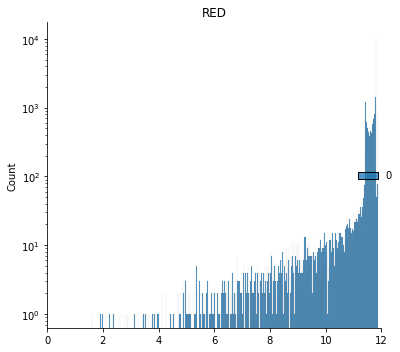

In [130]:
import seaborn as sns
plt.figure(1)
sns.displot(dct_red.values(),log_scale=(False,True))
plt.title('RED')
plt.xlim(0,12)
plt.tight_layout()
plt.savefig('redentropy_distribution_general.png')

<Figure size 432x288 with 0 Axes>

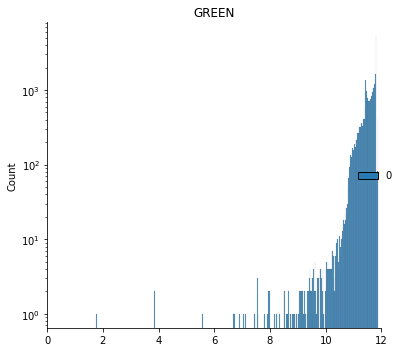

In [131]:
plt.figure(2)
sns.displot(dct_green.values(),log_scale=(False,True))
plt.xlim(0,12)

plt.title('GREEN')
plt.tight_layout()

plt.savefig('greenentropy_distribution_general.png')

<Figure size 432x288 with 0 Axes>

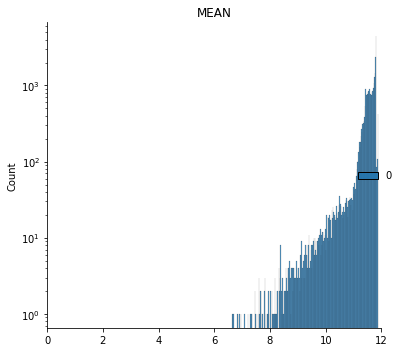

In [132]:
plt.figure(3)
sns.displot(dct_mean.values(),log_scale=(False,True))
plt.xlim(0,12)
plt.title('MEAN')
plt.tight_layout()


plt.savefig('meanentropy_distribution_general.png')

In [9]:
circuit=2
variant=0
n_parametersets = 1000000
lsa_df = pickle.load( open( modelling_home + '/3954/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit,variant,n_parametersets), 'rb' ) )



In [10]:
lsa_df['system_class'].loc[5716,0]

'turing I'

In [11]:
lsa_df['system_class'].value_counts()

simple stable           1266543
simple unstable          254878
turing I                   2689
turing I oscillatory       1263
unclassified                998
hopf                        409
no steady state             298
turing I hopf               225
turing II hopf               44
turing II                    37
Name: system_class, dtype: int64

In [12]:
parID_list = []
lsa_df_index = np.unique(lsa_df.index.get_level_values(0))
for parID in lsa_df_index:
    if str(parID) in dct_green.keys():
        parID_list.append(parID)
parID_list

[1,
 2,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 88,
 89,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 2

In [13]:
parID_systemclass_dict = {}
parID_greenentropy_dict = {}
parID_redentropy_dict = {}


for parID in parID_list:
    parID_systemclass_dict[parID] = lsa_df['system_class'].loc[parID,0]
    parID_greenentropy_dict[parID] = dct_green[str(parID)]
    parID_redentropy_dict[parID] = dct_red[str(parID)]

parID_systemclass_dict

{1: 'simple stable',
 2: 'simple unstable',
 4: 'simple stable',
 5: 'simple stable',
 6: 'simple stable',
 8: 'simple stable',
 9: 'simple stable',
 10: 'simple stable',
 11: 'simple stable',
 12: 'simple stable',
 13: 'simple stable',
 14: 'simple stable',
 15: 'simple stable',
 17: 'simple stable',
 18: 'simple stable',
 19: 'simple stable',
 20: 'simple unstable',
 21: 'simple stable',
 23: 'simple stable',
 24: 'simple unstable',
 25: 'simple stable',
 26: 'simple stable',
 27: 'simple stable',
 28: 'simple stable',
 29: 'simple stable',
 30: 'simple unstable',
 31: 'simple stable',
 32: 'simple unstable',
 33: 'simple stable',
 34: 'simple stable',
 35: 'simple stable',
 36: 'simple stable',
 37: 'simple stable',
 38: 'simple stable',
 39: 'simple stable',
 40: 'simple stable',
 41: 'simple stable',
 42: 'simple stable',
 43: 'simple stable',
 44: 'simple stable',
 46: 'simple stable',
 47: 'simple stable',
 49: 'simple stable',
 51: 'simple stable',
 52: 'simple stable',
 53: 's

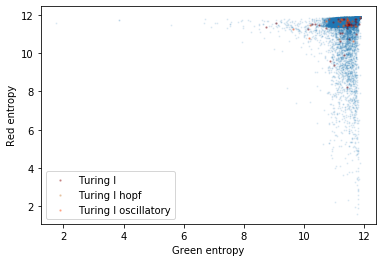

In [104]:
import pandas as pd
data = {'parID':list(parID_systemclass_dict.keys()), 'system_class':list(parID_systemclass_dict.values()), 'green_entropy' : list(parID_greenentropy_dict.values()), 'red_entropy' : list(parID_redentropy_dict.values())}
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# ax.scatter(df['green_entropy'], df['red_entropy'], c=df['system_class'].map(colors),s=1,alpha=0.1)


ax.scatter(df['green_entropy'], df['red_entropy'], s=1,alpha=0.1)

ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I'], df['red_entropy'].loc[df['system_class'] == 'turing I'], c='darkred',s=2,alpha=0.3,label='Turing I')
ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I hopf'], df['red_entropy'].loc[df['system_class'] == 'turing I hopf'],c='peru', s=2,alpha=0.3,label='Turing I hopf')
ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I oscillatory'], df['red_entropy'].loc[df['system_class'] == 'turing I oscillatory'],c='orangered', s=2,alpha=0.3,label='Turing I oscillatory')


plt.legend()

plt.ylabel('Red entropy')
plt.xlabel('Green entropy')

plt.savefig('redgreen_scatter.png',dpi=1000)

In [17]:
system_types = np.unique(df['system_class'])

array(['hopf', 'no steady state', 'simple stable', 'simple unstable',
       'turing I', 'turing I hopf', 'turing I oscillatory', 'turing II',
       'turing II hopf', 'unclassified'], dtype=object)

In [170]:
len(list(parID_greenentropy_dict.values()))

28124

<Figure size 432x288 with 0 Axes>

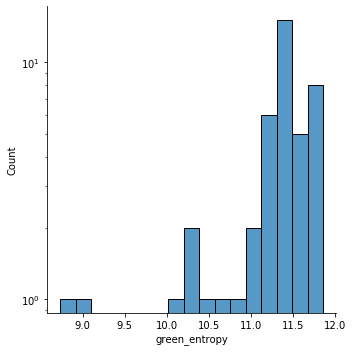

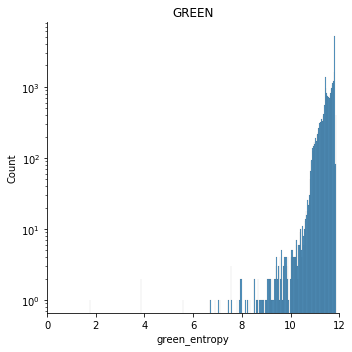

In [121]:
plt.figure(2)

sns.displot(df['green_entropy'].loc[df['system_class'] == 'turing I'],log_scale=(False,True))
sns.displot(df['green_entropy'],log_scale=(False,True))

plt.xlim(0,12)
plt.title('GREEN')
plt.tight_layout()
plt.show()

# plt.savefig('greenentropy_distribution_general.png')